# Videos and Exercises for Session 3: Data Structuring in Pandas II

In this combined teaching module and exercise set, you will continue working with structuring data. 

In the last session, you were working with making operations on relatively clean data. However, before it is meaningful to make such operations, you will (as a data scientist) often have to do some very preliminary cleaning, involving for instance dealing with missings and duplicates as well as combining and restructuring larger sets of data. These are among the topics that we will be focusing on today.

The notebook is structured as follows:
1. Missings and Duplicated Data:
    - Handling Missings: Delete or Interpolate?
    - Spotting and Interpreting Duplicates
2. Combining Data Sets:
    - Intro to `merge`, `concat` and `join`
    - Horizontal and Vertical Merging
3. Split-Apply-Combine
    - Finding Means and Other Characteristics from Data Subsets (aggregation)
4. Reshaping Data
    - Wide and Long Data
    - Intro to `stack`

## Loading
Before we get started.... load in the required modules and set up the plotting library!

In [275]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

#  Part 1: Duplicates and Missings

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. This is an extract from the US Census containing almost 50,000 rows of individual-level micro data from 1994.


> **Ex. 3.1.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.
>
> _Hint 1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 
>
> _Hint 2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [276]:
# Define column names
cols = ['age', 'workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']

# Load data into DataFrame
df_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
data = pd.read_csv(df_url, names=cols, skipinitialspace=True)

# Display rows 25 to 35
rows_25_to_35 = data.iloc[24:35]
rows_25_to_35

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


##  Missing data

Often our data having information missing, e.g. one row lacks data on education for a specific person. Watch the video below about missing data type and get some simple tools to deal with the problem.

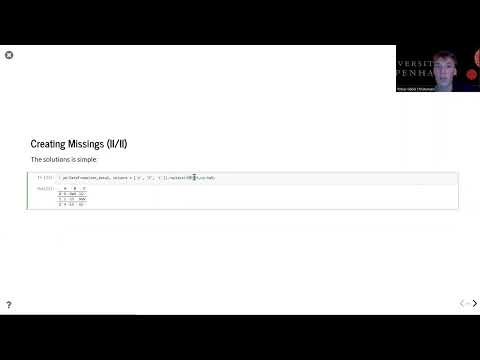

In [277]:
YouTubeVideo('mX6uMt_1-Lk', width=640, height=360)

> **Ex. 3.1.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. Store this new dataframe as `df_census_new`. How many rows are removed in this operation?
> 
> _Hint:_ NaN from NumPy might be useful. What you should discover here is that pandas indeed has native methods for dealing with missings.

In [278]:
from numpy import NaN

# Replace '?' with NaN in the existing DataFrame
data.replace('?', np.nan)

# Drop rows with missing values
df_census_new = data.dropna()

# Calculate the number of rows removed
rows_removed = len(data) - len(df_census_new)

print(f"Number of rows removed: {rows_removed}")


Number of rows removed: 0


##  Duplicated Data

Watch the video below about duplicated data and how to handle such observations.

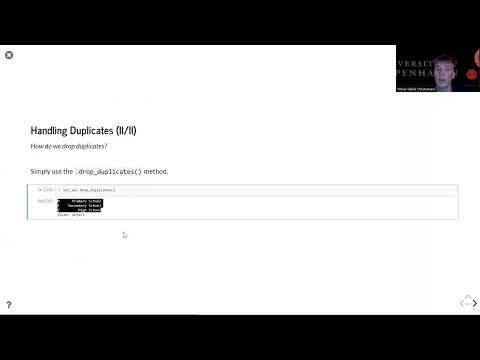

In [279]:
YouTubeVideo('aQrqhJnHIqQ', width=640, height=360)

> **Ex. 3.1.3:** Determine whether or not duplicated rows is a problem in the NOAA weather data and the US census data. You should come up with arguments from the structure of the rows.
>
> *Hint:* Just use the `load_weather()` function from the last module (provided below) to load weather data from 1863 only.

In [280]:
def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out

In [281]:
load_weather(1863)

,station,datetime,obs_type,obs_value
0,AGE00135039,18630102,TMAX,11.5
1,AGE00135039,18630103,TMAX,11.0
2,AGE00135039,18630105,TMAX,15.5
3,AGE00135039,18630106,TMAX,16.5
4,AGE00135039,18630107,TMAX,15.0
...,...,...,...,...
5505,USW00014838,18630727,TMAX,20.6
5506,USW00014838,18630728,TMAX,19.9
5507,USW00014838,18630729,TMAX,25.1
5508,USW00014838,18630730,TMAX,29.4


For the NOAA Weather Data, duplicated rows are not a problem due to the nature of the data and the processing steps in the provided function. However, for US Census Data, duplicate rows could be a potential issue, since duplicate rows in the data could be problematic as they may represent incorrect or duplicated information about an individual, potentially leading to incorrect statistical analysis or insights. 

# Part 2: Combining Data Sets

Below we hear about how different datasets can be combined into one, by merging on overlapping information that exists in both datasets.

**Note:** In the video, we are only dealing with one-to-one joins. This is a type of merge where there is only one row with a given merge key in each data frame. However, you may encounter situations where there are multiple rows that share the value of a merge key. In this situation, you may perform a one-to-many join or a many-to-many join that forms a Cartesian product of your rows.

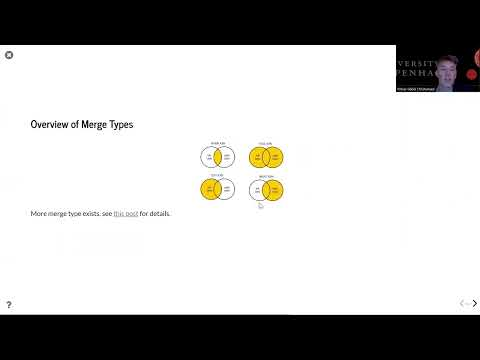

In [282]:
YouTubeVideo('y2YL_cMp8v0', width=640, height=360)

We now continue with structuring weather data. Use the function `load_weather()` for fetching and structuring weather data that you also used above.

> **Ex. 3.2.1:** Get the processed data from years 1870-1875 as a list of DataFrames. Generate a variable that denotes the year that the observations belong to. Convert the list into a single DataFrame by concatenating vertically. 

In [283]:
# Define a list to store DataFrames for each year
weather_data_list = []

# Loop through years 1870 to 1875
for year in range(1870, 1876):
    # Fetch and structure weather data for each year
    df_weather_year = load_weather(year)
    
    # Add a new column 'year' to denote the year of observations
    df_weather_year['year'] = year
    
    # Append the DataFrame to the list
    weather_data_list.append(df_weather_year)

# Concatenate DataFrames vertically into a single DataFrame
df_weather_period = pd.concat(weather_data_list, ignore_index=True)

# Display the resulting DataFrame
df_weather_period


,station,datetime,obs_type,obs_value,year
0,ASN00063004,18700809,TMAX,10.0,1870
1,ASN00063004,18700810,TMAX,8.9,1870
2,ASN00063004,18700811,TMAX,15.6,1870
3,ASN00063004,18700812,TMAX,16.7,1870
4,ASN00063004,18700813,TMAX,16.7,1870
...,...,...,...,...,...
139407,USW00094728,18751227,TMAX,10.6,1875
139408,USW00094728,18751228,TMAX,1.1,1875
139409,USW00094728,18751229,TMAX,2.8,1875
139410,USW00094728,18751230,TMAX,6.7,1875


# Part 3: Split-Apply-Combine

Often we need to process information for a given individual, point in time etc. Instead of writing a loop over all the subsets of the data, we can use a more clever approach. Below we introduce the split-apply-combine framework and show how we can leverage it in pandas

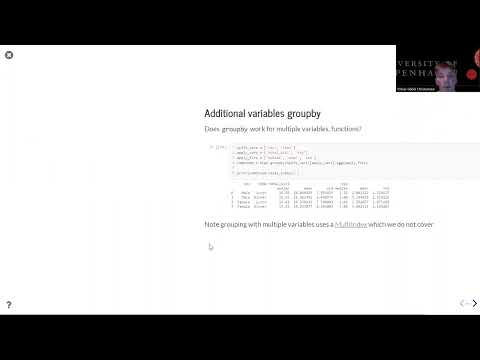

In [284]:
YouTubeVideo('pZinSHCRgbA', width=640, height=360)

*Note:* The Split-Apply-Combine method uses `.groupby()`. As indicated in the video, `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [285]:
from datetime import datetime

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
   
   # Load the weather data into a DataFrame, select first four columns, and rename the columns
    df_weather = pd.read_csv(url, header=None).iloc[:, :4]
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    
    # Convert the 'obs_value' column to Celsius from tenths of Celsius
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    
    # Select only the rows with 'obs_type' equal to 'TMAX' (maximum temperature),
    # then sort the DataFrame by 'station' and 'datetime',
    # and reset the index while dropping the old index
    df_out = df_weather[df_weather['obs_type'] == 'TMAX'] \
        .sort_values(by=['station', 'datetime']) \
        .reset_index(drop=True)
    
   # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    # Set 'datetime_dt' as the temporal index
    df_out.set_index('datetime_dt', inplace=True)
    
    return df_out


df_weather_period = [load_weather(year) for year in range(1870, 1875)]

df_weather_period

[                 station  datetime obs_type  obs_value area  month  year
 datetime_dt                                                             
 1870-08-09   ASN00063004  18700809     TMAX       10.0   AS      8  1870
 1870-08-10   ASN00063004  18700810     TMAX        8.9   AS      8  1870
 1870-08-11   ASN00063004  18700811     TMAX       15.6   AS      8  1870
 1870-08-12   ASN00063004  18700812     TMAX       16.7   AS      8  1870
 1870-08-13   ASN00063004  18700813     TMAX       16.7   AS      8  1870
 ...                  ...       ...      ...        ...  ...    ...   ...
 1870-12-27   USW00094728  18701227     TMAX       -1.1   US     12  1870
 1870-12-28   USW00094728  18701228     TMAX        0.0   US     12  1870
 1870-12-29   USW00094728  18701229     TMAX       -5.0   US     12  1870
 1870-12-30   USW00094728  18701230     TMAX       -1.1   US     12  1870
 1870-12-31   USW00094728  18701231     TMAX        5.6   US     12  1870
 
 [12367 rows x 7 columns],
         

In [286]:
# Concatenate alle dataframes i listen:
df_combined2 = pd.concat(df_weather_period)

# Group together: 
df_combined_grouped = df_combined2.groupby(['year', 'month', 'station'])

df_combined2['tmax_mean'] = df_combined_grouped['obs_value'].transform('mean') # beregn gennemsnittet
df_combined2['tmax_median'] = df_combined_grouped['obs_value'].transform('median') # beregn medianen

df_combined2


,station,datetime,obs_type,obs_value,area,month,year,tmax_mean,tmax_median
datetime_dt,,,,,,,,,
1870-08-09,ASN00063004,18700809,TMAX,10.0,AS,8,1870,15.047826,15.6
1870-08-10,ASN00063004,18700810,TMAX,8.9,AS,8,1870,15.047826,15.6
1870-08-11,ASN00063004,18700811,TMAX,15.6,AS,8,1870,15.047826,15.6
1870-08-12,ASN00063004,18700812,TMAX,16.7,AS,8,1870,15.047826,15.6
1870-08-13,ASN00063004,18700813,TMAX,16.7,AS,8,1870,15.047826,15.6
...,...,...,...,...,...,...,...,...,...
1874-12-27,USW00094728,18741227,TMAX,8.3,US,12,1874,4.593548,5.0
1874-12-28,USW00094728,18741228,TMAX,10.0,US,12,1874,4.593548,5.0
1874-12-29,USW00094728,18741229,TMAX,9.4,US,12,1874,4.593548,5.0


In [287]:
#Print the amount of unique values of 'tmax_mean':
df_combined2['tmax_mean'].nunique()

3398

In [288]:
#Print the amount of unique values of 'tmax_median':
df_combined2['tmax_median'].nunique()

595

> **Ex. 3.3.2:** Plot the monthly max, min, mean, first and third quartiles for maximum temperature for our station with the ID _'CA006110549'_ for the years 1870-1875. 

> *Hint*: the method `describe` computes all these measures.

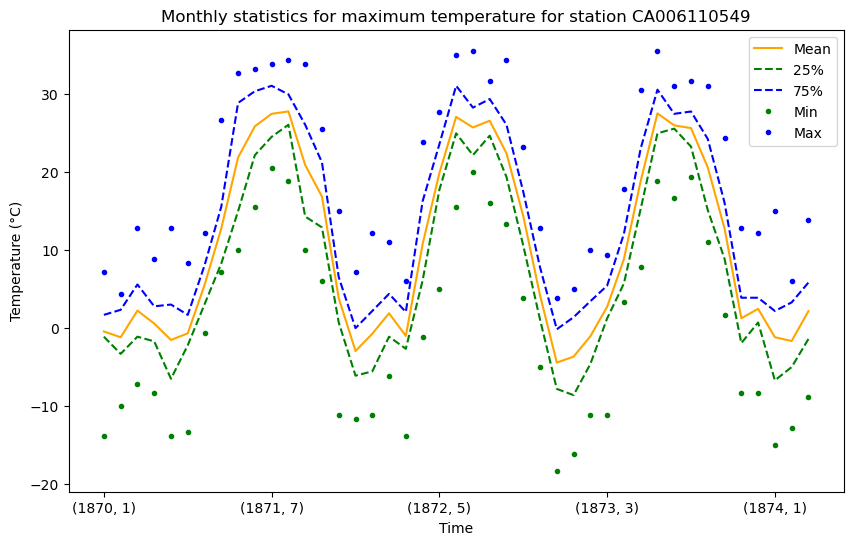

In [311]:
# Select data for the specified station
df_station = df_combined2[df_combined2['station'] == 'CA006110549']

# Group data by year and month, and calculate statistics
df_station_grouped = df_station.groupby(['year', 'month'])['obs_value'].describe()

# Plot results
fig, ax = plt.subplots(figsize=(10,6))

# Mean
df_station_grouped['mean'].plot(ax=ax, color='orange', label='Mean')

# 25% and 75% quantiles
df_station_grouped['25%'].plot(ax=ax, linestyle='dashed', color='green', label='25%')
df_station_grouped['75%'].plot(ax=ax, linestyle='dashed', color='blue', label='75%')

# Min and Max
df_station_grouped['min'].plot(ax=ax, style='.', color='green', label='Min')
df_station_grouped['max'].plot(ax=ax, style='.', color='blue', label='Max')

# Median (commented out)
# df_station_grouped['50%'].plot(ax=ax, label='Median')

plt.title('Monthly statistics for maximum temperature for station CA006110549')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [ ]:
# INCLUDED IN ASSIGNMENT 1

> **Ex. 3.3.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1870-1875.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has *fixed width format* - does there exist a pandas reader for that? Here Google might be helpful!

In [339]:
71-42

29

In [346]:
import pandas as pd
 
url = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt"

# Rename columns for clarity
colnames = ['station', 'latitude', 'longitude', 'elevation', 'state', 'name', 'gsn_flag', 'hcn_crn_flag', 'wmo_id']

col_width = [11, 9, 10, 7, 3, 31, 4, 4, 5]

df_stations = pd.read_fwf(url, width=col_width, names=colnames, header=None)

df_stations


,station,latitude,longitude,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0,NaN
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0,NaN
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0,NaN
...,...,...,...,...,...,...,...,...,...
124949,ZI000067969,21.0500,29.3670,861.0,WEST NICHOLSON,NaN,NaN,67969.0,NaN
124950,ZI000067975,20.0670,30.8670,1095.0,MASVINGO,NaN,NaN,67975.0,NaN
124951,ZI000067977,21.0170,31.5830,430.0,BUFFALO RANGE,NaN,NaN,67977.0,NaN
124952,ZI000067983,20.2000,32.6160,1132.0,CHIPINGE,NaN,GSN,67983.0,NaN


In [358]:
# Merge the weather data with the station location data based on the common 'station' ID
df_weather_with_location = pd.merge(df_combined2, df_stations, on='station', how='left')

# Display the merged DataFrame
df_weather_with_location

,station,datetime,obs_type,obs_value,area,month,year,tmax_mean,tmax_median,latitude,longitude,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id
0,ASN00063004,18700809,TMAX,10.0,AS,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN,NaN
1,ASN00063004,18700810,TMAX,8.9,AS,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN,NaN
2,ASN00063004,18700811,TMAX,15.6,AS,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN,NaN
3,ASN00063004,18700812,TMAX,16.7,AS,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN,NaN
4,ASN00063004,18700813,TMAX,16.7,AS,8,1870,15.047826,15.6,33.4167,149.5500,704.0,BATHURST GAOL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105544,USW00094728,18741227,TMAX,8.3,US,12,1874,4.593548,5.0,40.7789,-73.9692,42.7,NY CITY CNTRL PARK,NaN,NaN,72506.0,NaN
105545,USW00094728,18741228,TMAX,10.0,US,12,1874,4.593548,5.0,40.7789,-73.9692,42.7,NY CITY CNTRL PARK,NaN,NaN,72506.0,NaN
105546,USW00094728,18741229,TMAX,9.4,US,12,1874,4.593548,5.0,40.7789,-73.9692,42.7,NY CITY CNTRL PARK,NaN,NaN,72506.0,NaN
105547,USW00094728,18741230,TMAX,-2.8,US,12,1874,4.593548,5.0,40.7789,-73.9692,42.7,NY CITY CNTRL PARK,NaN,NaN,72506.0,NaN


In [359]:
# INCLUDED IN ASSIGNMENT 1

##  Bonus Exercises

If you want to practice *split-apply-combine* a bit more before proceeding, we have generated two additional exercises that use the US census data from Part 1. In order to solve this exercise, you should use `df_census_new` which you generated in a previous exercise.
> **Ex. 3.3.4:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [360]:
# Group the data by 'sex' column
grouped_by_sex = df_census_new.groupby('sex')

# Calculate the percentage of individuals earning more than $50K in each group
total_count = grouped_by_sex['wage'].count()
high_income_count = grouped_by_sex.apply(lambda x: (x['wage'] == '>50K').sum())
percentage_high_income = (high_income_count / total_count) * 100

# Combine the results into a new DataFrame
gender_wage_gap = pd.DataFrame({
    'Percentage Earning >50K': percentage_high_income
})

# Display the table
print(gender_wage_gap)


        Percentage Earning >50K
sex                            
Female                10.946059
Male                  30.573658


The result above shows that 31,4 pct. of men earn above 50K, whereas only 11,4 % of women earn the same amount. This is proof of a gender wage gap.

> **Ex. 3.3.5:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ remember the `.query()` method is extremely useful for filtering data.

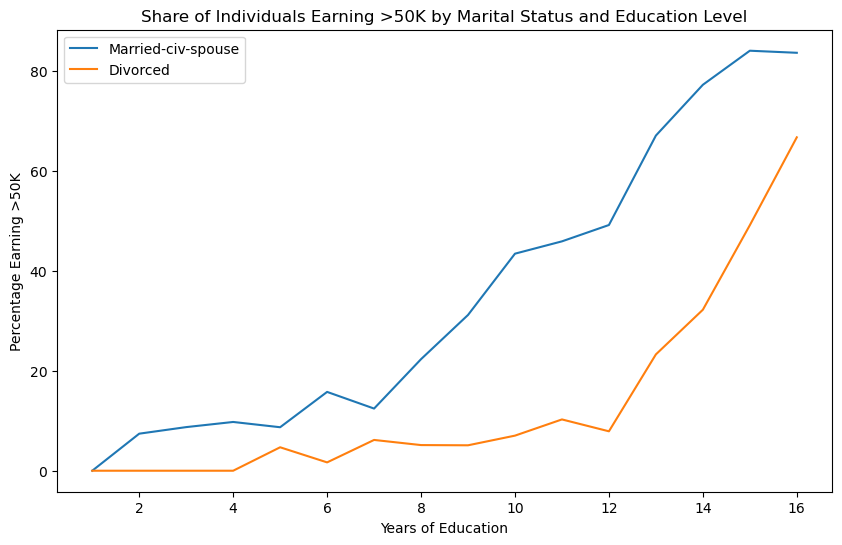

In [361]:
import matplotlib.pyplot as plt

# Filter the data to include only 'Divorced' and 'Married-civ-spouse' groups
filtered_data = df_census_new.query("marital_status == 'Divorced' or marital_status == 'Married-civ-spouse'")

# Group the data by 'educ_num' and 'marital_status'
grouped_data = filtered_data.groupby(['educ_num', 'marital_status'])

# Calculate the percentage of individuals earning more than $50K in each group
total_count = grouped_data['wage'].count()
high_income_count = grouped_data.apply(lambda x: (x['wage'] == '>50K').sum())
percentage_high_income = (high_income_count / total_count) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
for status in filtered_data['marital_status'].unique():
    data_subset = percentage_high_income.xs(status, level='marital_status')
    ax.plot(data_subset.index, data_subset.values, label=status)

ax.set_xlabel('Years of Education')
ax.set_ylabel('Percentage Earning >50K')
ax.set_title('Share of Individuals Earning >50K by Marital Status and Education Level')
ax.legend()
plt.show()


# Part 4: Reshaping  Dataframes

Often we have data that comes in a format that does not fit our purpose.

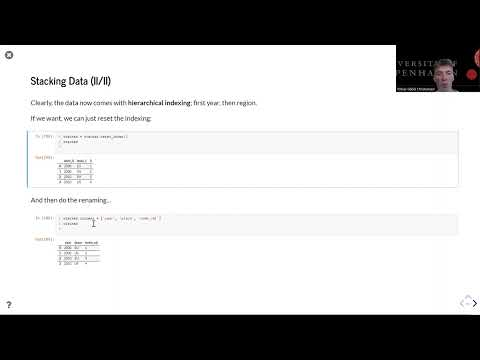

In [362]:
YouTubeVideo('cJOo01dj5hs', width=640, height=360)

In this exercise, we continue working with the NOAA data that you worked with in the main section of part 3.

> **Ex. 3.4.1:** For which months was the temperature in general (i.e. use the mean) lower in 1870 vs. 1875?
>
> *Hint:* you may use `unstack`.

In [397]:
# Group together: 
df_combined_grouped = df_combined2.groupby(['year', 'month'])['tmax_mean'].mean()

df_combined_grouped.unstack(level='year')

df_combined_grouped

year  month
1870  1         6.014052
      2         4.846081
      3         7.222374
      4        15.242456
      5        19.399303
      6        22.737856
      7        24.162403
      8        22.710448
      9        19.946442
      10       15.763128
      11       10.836485
      12        5.128043
1871  1         3.726329
      2         6.551479
      3        10.927658
      4        14.231455
      5        17.901134
      6        20.238003
      7        23.151374
      8        23.519154
      9        19.561946
      10       15.995112
      11        8.501958
      12        4.701041
1872  1         5.544101
      2         6.803171
      3         7.183613
      4        14.090786
      5        18.449194
      6        22.763902
      7        25.056778
      8        24.201502
      9        21.225197
      10       15.753561
      11        8.815811
      12        3.160142
1873  1         3.321473
      2         3.785288
      3         8.132554
      4      

**Look at the slides from module 5.**